In [1]:
import pandas as pd

In [2]:
file_path = '/Users/abderrahim_boussyf/Desktop/Annalyse_Electr/TB Fin Mai 2024.xlsm'

# Read the Excel file
df = pd.read_excel(file_path, sheet_name='BDD 2023')

# Display the first few rows of the dataframe
print(df.head())

   ANNEE       MOIS DIRECTION        DP POSTE SOURCE LIGNE OU INSTALLATION  \
0   2023 2023-01-01       DRL  LAAYOUNE     LAAYOUNE    LAAYOUNE - TARFAYA   
1   2023 2023-01-01       DRL   GUELMIM  BOUIZAKARNE    BOUIZAKARNE - ADAY   
2   2023 2023-01-01       DRL   GUELMIM  BOUIZAKARNE    BOUIZAKARNE - ADAY   
3   2023 2023-01-01       DRL   GUELMIM      GUELMIM      GUELMIM - FASK     
4   2023 2023-01-01       DRL   GUELMIM      GUELMIM      GUELMIM - FASK     

            EVENEMENTS   DATE ET HEURE Déc              ORIGINE  \
0     DECL DRR AMGRIOU 2023-01-01 22:45:00             INCIDENT   
1          DECL DEPART 2021-01-03 09:56:00             INCIDENT   
2          DECL DEPART 2021-01-03 09:56:00             INCIDENT   
3          DECL DEPART 2023-01-05 14:12:00             INCIDENT   
4  ISOLEMENT D'URGENCE 2023-01-05 15:20:00  ISOLEMENT D'URGENCE   

                                            TRONCONS  ...       DUREE (H)  \
0  TR/L : DRR IAM AMGRIO - PT AMGRIO Mle:L1A-003-15

In [3]:
# Display summary information about the DataFrame
print(df.info())

# Display basic statistics of the DataFrame
print(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 33 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [4]:
# Filter the DataFrame for rows related to Dakhla
dakhla_df = df[df['POSTE SOURCE'].str.contains('DAKHLA', na=False)]

In [5]:
# Display the first few rows of the filtered DataFrame
print(dakhla_df.head())

# Display summary information about the filtered DataFrame
print(dakhla_df.info())

# Display basic statistics of the filtered DataFrame
print(dakhla_df.describe(include='all'))


    ANNEE       MOIS DIRECTION      DP     POSTE SOURCE  \
37   2023 2023-01-01       DRL  DAKHLA           DAKHLA   
38   2023 2023-01-01       DRL  DAKHLA  CENTRALE DAKHLA   
39   2023 2023-01-01       DRL  DAKHLA  CENTRALE DAKHLA   
40   2023 2023-01-01       DRL  DAKHLA  CENTRALE DAKHLA   
41   2023 2023-01-01       DRL  DAKHLA  CENTRALE DAKHLA   

          LIGNE OU INSTALLATION   EVENEMENTS   DATE ET HEURE Déc   ORIGINE  \
37               DAKHLA - PRD 1  DECL DEPART 2023-01-30 12:25:00  INCIDENT   
38        CENTRALE DAKHLA - CQP  DECL DEPART 2023-01-30 12:25:00  INCIDENT   
39        CENTRALE DAKHLA - CQP  DECL DEPART 2023-01-30 12:25:00  INCIDENT   
40  CENTRALE DAKHLA - CONGELDAK  DECL DEPART 2023-01-30 12:25:00  INCIDENT   
41     CENTRALE DAKHLA - PORT I  DECL DEPART 2023-01-30 12:25:00  INCIDENT   

    TRONCONS  ...       DUREE (H)      Cl*HI Kva * H interr E N D (KWH)  \
37  TOTALITE  ... 0 days 00:05:00   0.000000       0.000000     0.00000   
38  TOTALITE  ... 0 days 0

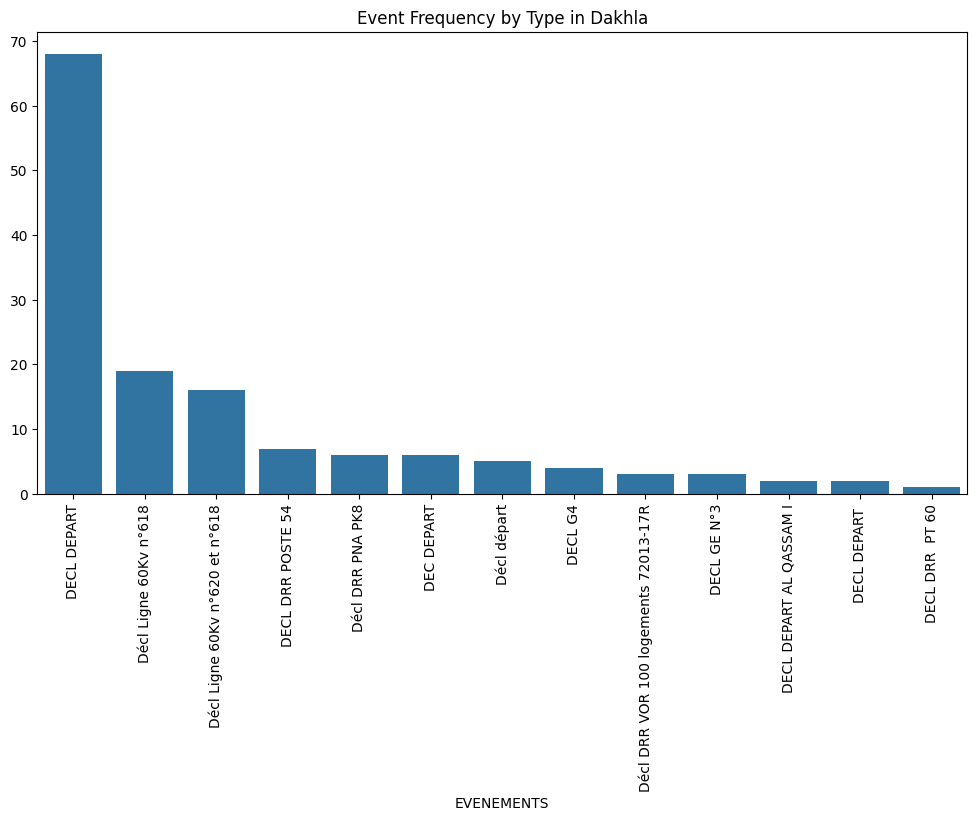

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
dakhla_event_count = dakhla_df['EVENEMENTS'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=dakhla_event_count.index, y=dakhla_event_count.values)
plt.title('Event Frequency by Type in Dakhla')
plt.xticks(rotation=90)
plt.show()


In [7]:
avg_duration_dakhla = dakhla_df['DUREE (H)'].mean()

print(f"Average Duration of Events in Dakhla: {avg_duration_dakhla}")

Average Duration of Events in Dakhla: 0 days 05:00:19.014260563


In [8]:
total_duration_dakhla = dakhla_df['DUREE (H)'].sum()

print(f"Total Duration of Events in Dakhla: {total_duration_dakhla}")

Total Duration of Events in Dakhla: 29 days 14:45:00.025000


In [9]:
# Filter the DataFrame for rows related to Dakhla
dakhla_df = df[df['POSTE SOURCE'].str.contains('DAKHLA', na=False)].copy()

# Ensure 'MOIS' is in datetime format and extract the month
dakhla_df.loc[:, 'MOIS'] = pd.to_datetime(dakhla_df['MOIS'], errors='coerce')
dakhla_df.loc[:, 'Month'] = dakhla_df['MOIS'].dt.month


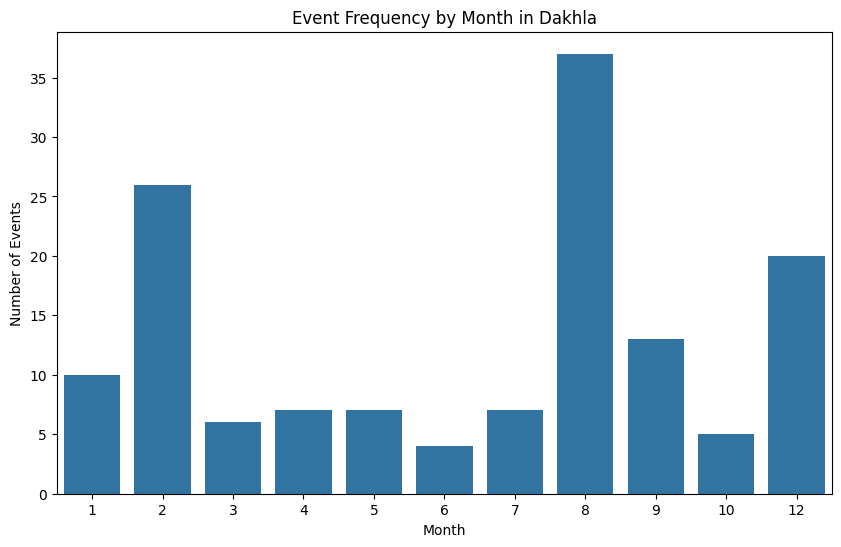

In [10]:
dakhla_df['MOIS'] = pd.to_datetime(dakhla_df['MOIS'], errors='coerce')
dakhla_df['Month'] = dakhla_df['MOIS'].dt.month

event_by_month = dakhla_df['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=event_by_month.index, y=event_by_month.values)
plt.title('Event Frequency by Month in Dakhla')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.show()


In [11]:
# Display the highest KWH events for Dakhla
dakhla_highest_kwh_events = dakhla_df.nlargest(10, 'E N D (KWH)')
dakhla_highest_kwh_events[['DATE ET HEURE Déc', 'EVENEMENTS', 'E N D (KWH)']]

,DATE ET HEURE Déc,EVENEMENTS,E N D (KWH)
538,2023-10-30 23:30:00,Décl DRR PNA PK8,1435.218748
418,2023-08-18 18:05:00,DECL G4,531.000000
465,2023-09-10 10:45:00,DECL DEPART,388.668750
416,2023-08-18 18:05:00,DECL G4,293.715625
249,2023-05-11 22:37:00,Décl départ,270.968750
251,2023-05-11 22:37:00,Décl départ,269.746875
487,2023-10-09 08:13:00,Décl DRR PNA PK8,248.771250
419,2023-08-18 05:30:00,Décl Ligne 60Kv n°620 et n°618,231.253125
370,2023-08-01 13:57:00,DECL DEPART,220.680000
446,2023-08-24 16:13:00,DEC DEPART,215.105625


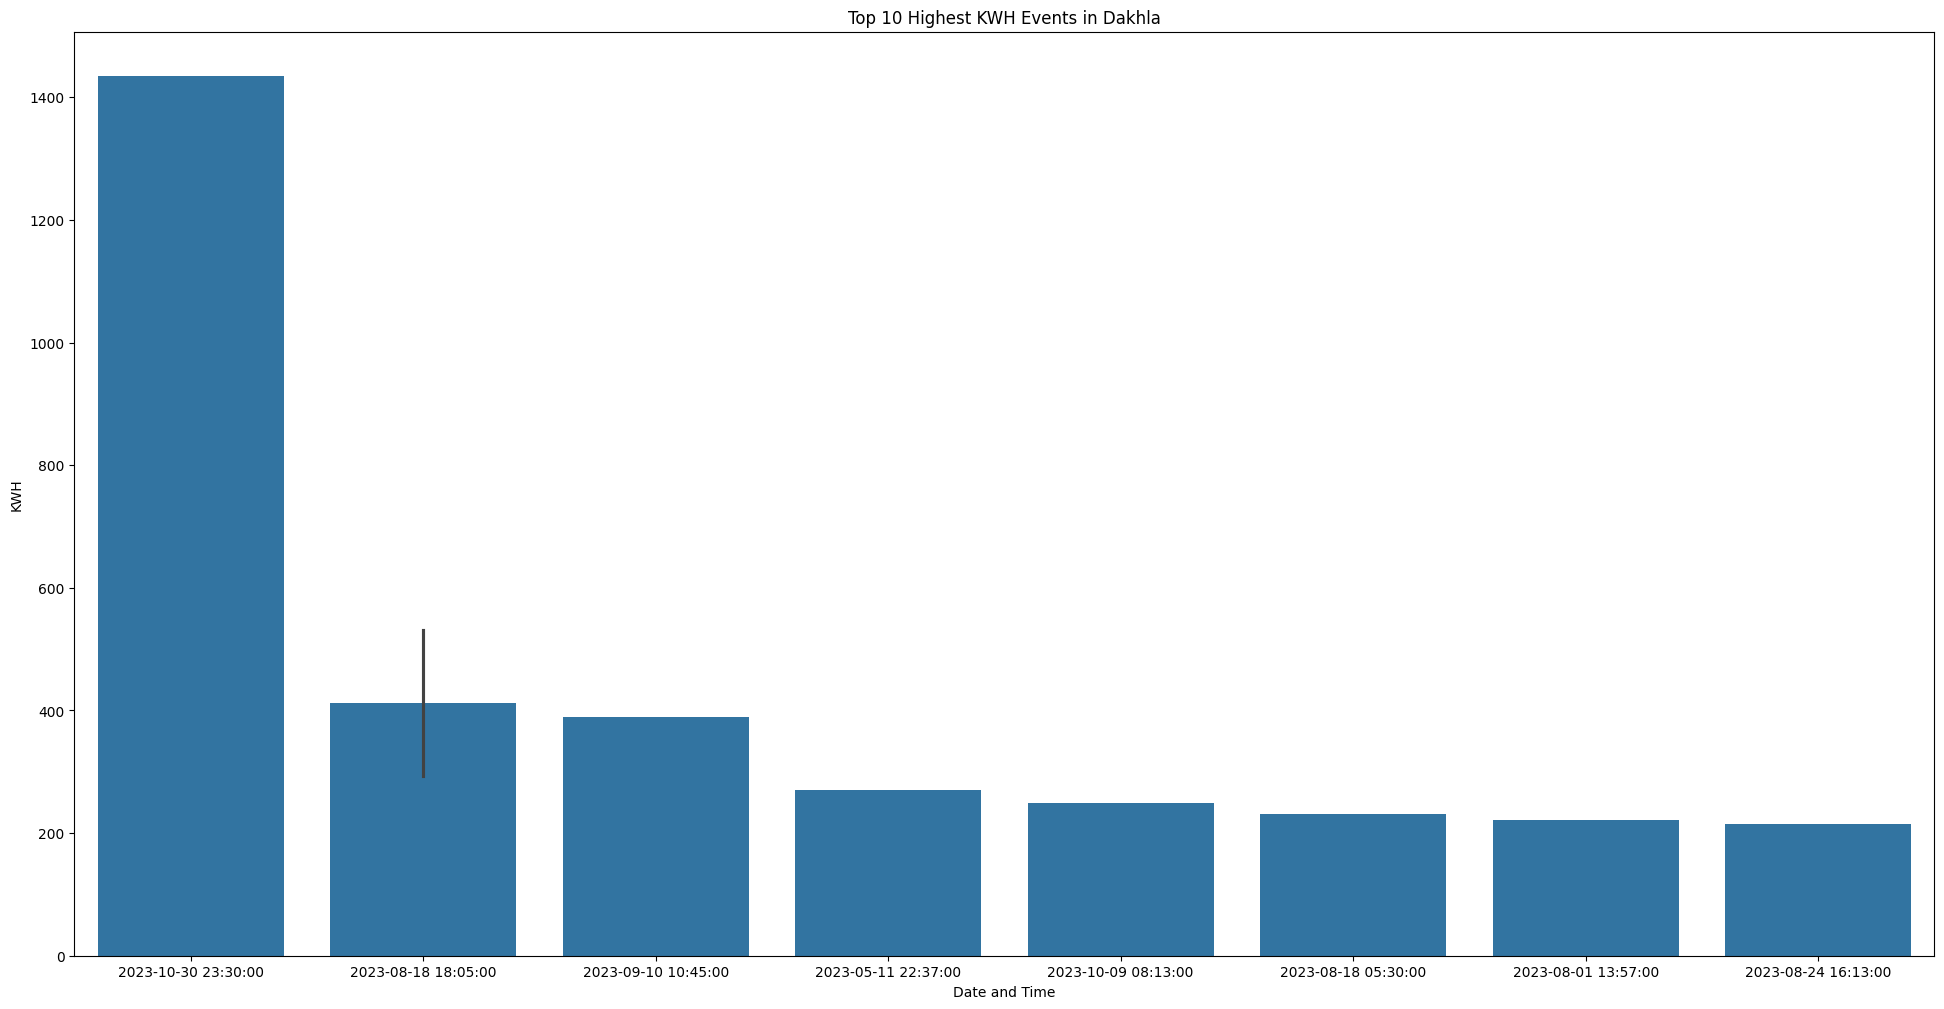

In [12]:
# Ensure 'E N D (KWH)' is numeric
dakhla_df['E N D (KWH)'] = pd.to_numeric(dakhla_df['E N D (KWH)'], errors='coerce')

# Get the top 10 highest KWH events
top_10_kwh_events = dakhla_df.nlargest(10, 'E N D (KWH)')

# Plot the data
plt.figure(figsize=(24,12))
sns.barplot(data=top_10_kwh_events, y='E N D (KWH)', x='DATE ET HEURE Déc')
plt.xlabel('Date and Time')
plt.ylabel('KWH')
plt.title('Top 10 Highest KWH Events in Dakhla')
plt.show()


In [13]:
df['DATE ET HEURE Déc'] = pd.to_datetime(df['DATE ET HEURE Déc'], errors='coerce')
df['Month'] = df['DATE ET HEURE Déc'].dt.to_period('M')

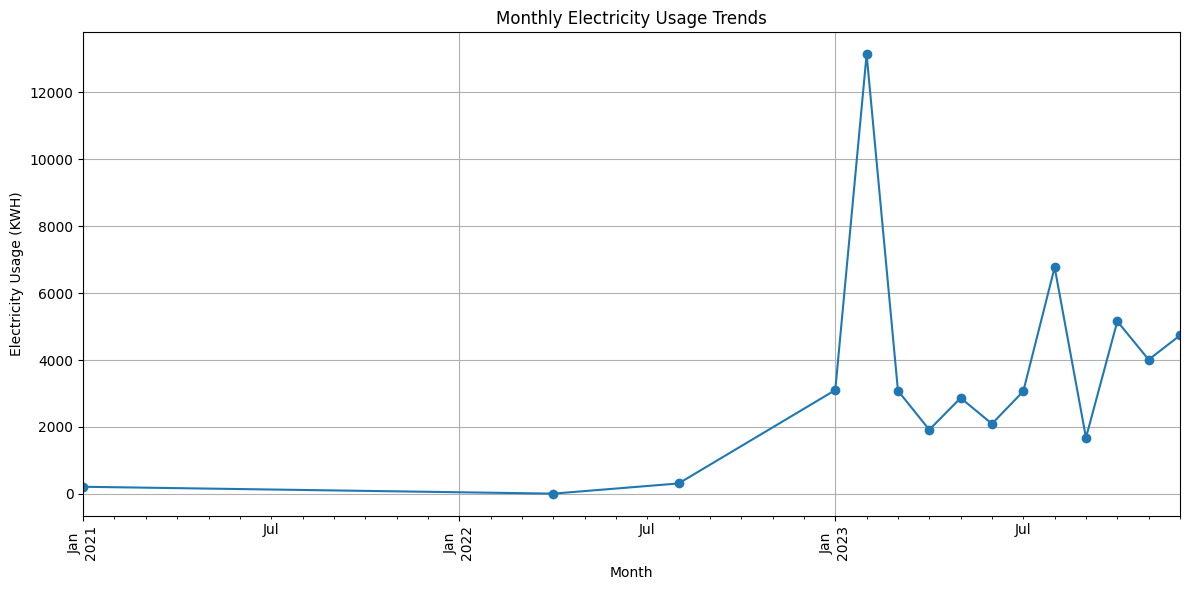

In [14]:
# Group by month and sum 'E N D (KWH)'
monthly_usage = df.groupby('Month')['E N D (KWH)'].sum()

# Plot the electricity usage trends
plt.figure(figsize=(12, 6))
monthly_usage.plot(kind='line', marker='o')
plt.title('Monthly Electricity Usage Trends')
plt.xlabel('Month')
plt.ylabel('Electricity Usage (KWH)')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()

/var/folders/7t/gg3mx1h95mb1m7llh2dfnhd40000gn/T/ipykernel_63515/3505235839.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dakhla['DATE ET HEURE Déc'] = pd.to_datetime(df_dakhla['DATE ET HEURE Déc'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


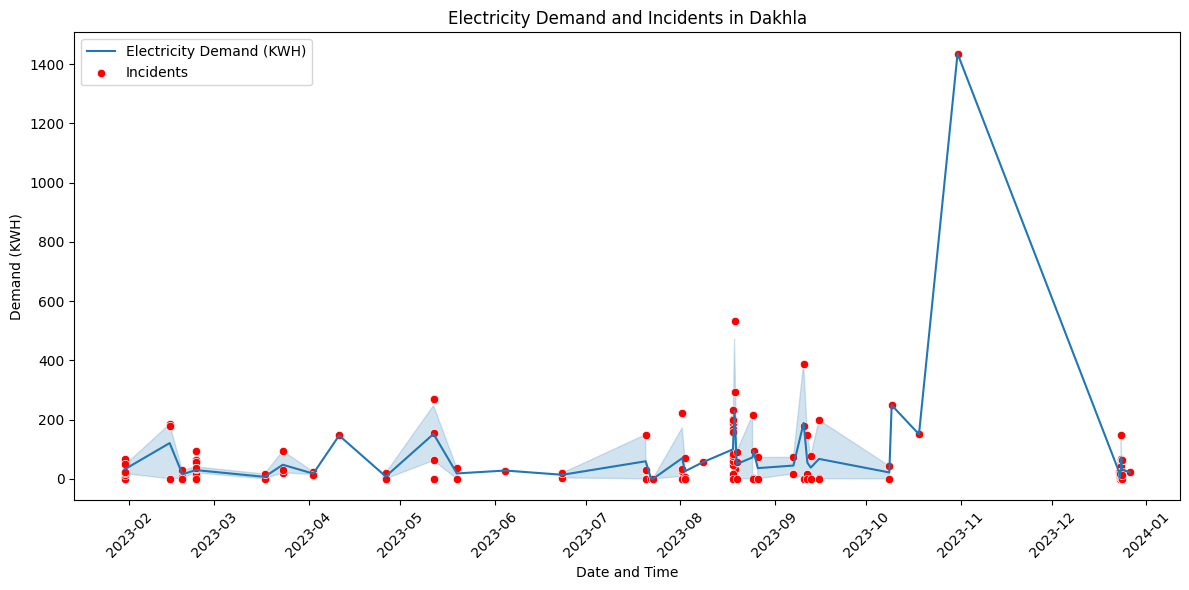

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_electricity_data(file_path):
    try:
        # Load Excel data into a DataFrame
        df = pd.read_excel(file_path, sheet_name='BDD 2023')
        
        # Filter data for Dakhla
        df_dakhla = df[df['POSTE SOURCE'].str.contains("DAKHLA", na=False)]
        
        # Check if necessary columns are present
        if 'DATE ET HEURE Déc' in df_dakhla.columns and 'E N D (KWH)' in df_dakhla.columns and 'EVENEMENTS' in df_dakhla.columns:
            # Convert 'DATE ET HEURE Déc' to datetime
            df_dakhla['DATE ET HEURE Déc'] = pd.to_datetime(df_dakhla['DATE ET HEURE Déc'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
            
            # Extract peak demand and incidents data
            peak_demand = df_dakhla['E N D (KWH)']
            incidents = df_dakhla[df_dakhla['EVENEMENTS'].notnull()]
            
            # Plot peak demand over time
            plt.figure(figsize=(12, 6))
            sns.lineplot(x=df_dakhla['DATE ET HEURE Déc'], y=peak_demand, label='Electricity Demand (KWH)')
            
            # Create a scatter plot to visualize incidents
            sns.scatterplot(x=incidents['DATE ET HEURE Déc'], y=peak_demand.loc[incidents.index], color='red', label='Incidents')
            
            plt.title('Electricity Demand and Incidents in Dakhla')
            plt.xlabel('Date and Time')
            plt.ylabel('Demand (KWH)')
            plt.legend()
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        else:
            if 'DATE ET HEURE Déc' not in df_dakhla.columns:
                print("Error: 'DATE ET HEURE Déc' column not found in the dataset.")
            if 'E N D (KWH)' not in df_dakhla.columns:
                print("Error: 'E N D (KWH)' column not found in the dataset.")
            if 'EVENEMENTS' not in df_dakhla.columns:
                print("Error: 'EVENEMENTS' column not found in the dataset.")
    
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
    except Exception as e:
        print(f"Error: {str(e)}")

# Example usage
file_path = '/Users/abderrahim_boussyf/Desktop/Annalyse_Electr/TB Fin Mai 2024.xlsm'
analyze_electricity_data(file_path)


/var/folders/7t/gg3mx1h95mb1m7llh2dfnhd40000gn/T/ipykernel_63515/3115915428.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dakhla['DUREE (H)'] = pd.to_timedelta(df_dakhla['DUREE (H)'], errors='coerce').dt.total_seconds() / 3600


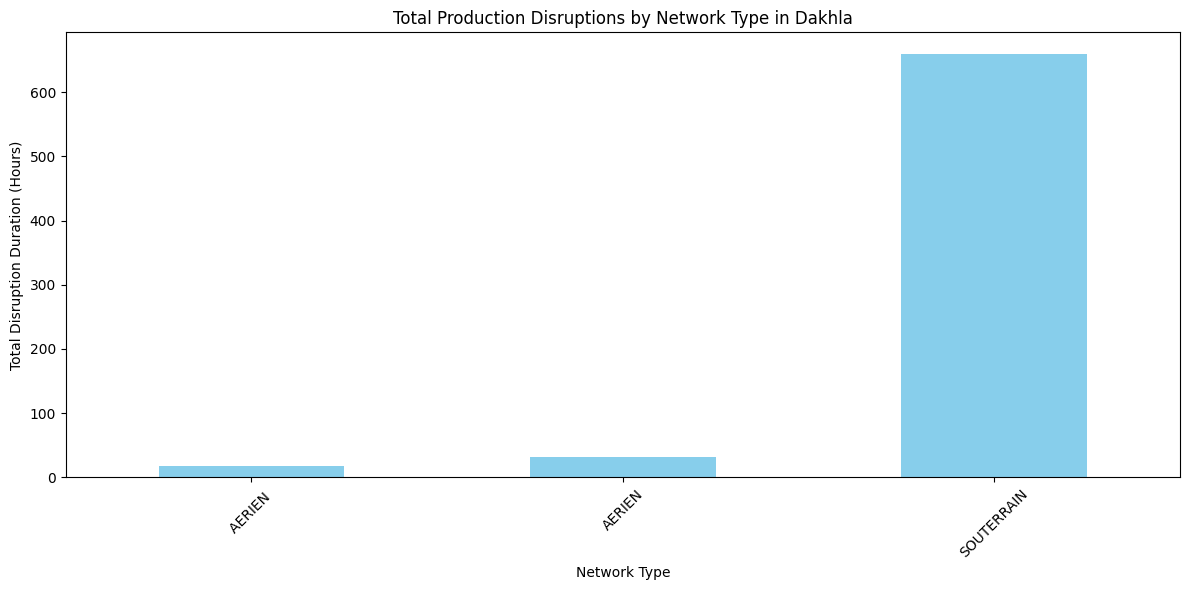

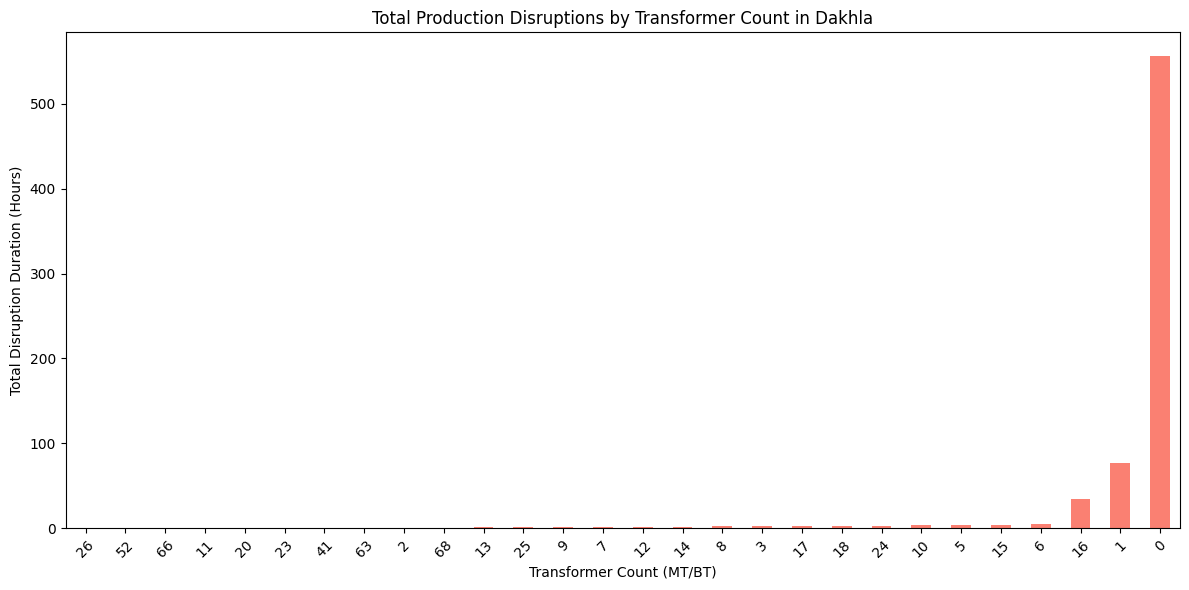

Correlation Matrix:
                    Nombre de PT MT/BT  DUREE (H)
Nombre de PT MT/BT            1.000000  -0.248323
DUREE (H)                    -0.248323   1.000000


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_network_and_transformer_disruptions(file_path):
    try:
        # Load Excel data into a DataFrame
        df = pd.read_excel(file_path, sheet_name='BDD 2023')
        
        # Filter data for Dakhla
        df_dakhla = df[df['POSTE SOURCE'].str.contains("DAKHLA", na=False)]
        
        # Check if necessary columns are present
        required_columns = ['NATURE DE RESEAU', 'Nombre de PT MT/BT', 'DUREE (H)']
        if all(column in df_dakhla.columns for column in required_columns):
            # Convert 'DUREE (H)' to numeric format (hours)
            df_dakhla['DUREE (H)'] = pd.to_timedelta(df_dakhla['DUREE (H)'], errors='coerce').dt.total_seconds() / 3600
            
            # Aggregate disruptions by network type and transformer count
            disruptions_by_network = df_dakhla.groupby('NATURE DE RESEAU')['DUREE (H)'].sum()
            disruptions_by_transformers = df_dakhla.groupby('Nombre de PT MT/BT')['DUREE (H)'].sum()
            
            # Plot disruptions by network type
            plt.figure(figsize=(12, 6))
            disruptions_by_network.sort_values().plot(kind='bar', color='skyblue')
            plt.title('Total Production Disruptions by Network Type in Dakhla')
            plt.xlabel('Network Type')
            plt.ylabel('Total Disruption Duration (Hours)')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            
            # Plot disruptions by transformer count
            plt.figure(figsize=(12, 6))
            disruptions_by_transformers.sort_values().plot(kind='bar', color='salmon')
            plt.title('Total Production Disruptions by Transformer Count in Dakhla')
            plt.xlabel('Transformer Count (MT/BT)')
            plt.ylabel('Total Disruption Duration (Hours)')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            
            # Correlation analysis
            correlation_data = df_dakhla[['Nombre de PT MT/BT', 'DUREE (H)']].dropna()
            correlation_matrix = correlation_data.corr()
            print("Correlation Matrix:")
            print(correlation_matrix)
            
        else:
            missing_columns = [column for column in required_columns if column not in df_dakhla.columns]
            print(f"Error: Missing columns in the dataset: {', '.join(missing_columns)}")
    
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
    except Exception as e:
        print(f"Error: {str(e)}")

# Example usage
file_path = '/Users/abderrahim_boussyf/Desktop/Annalyse_Electr/TB Fin Mai 2024.xlsm'
analyze_network_and_transformer_disruptions(file_path)


In [17]:
import pandas as pd

def analyze_network_disruptions(file_path):
    # Load Excel data into a DataFrame
    df = pd.read_excel(file_path, sheet_name='BDD 2023')

    # Filter for Dakhla
    df_dakhla = df[df['POSTE SOURCE'].str.contains('DAKHLA', na=False)]
    
    # Convert 'DUREE (H)' to a duration in hours
    df_dakhla['DUREE (H)'] = pd.to_timedelta(df_dakhla['DUREE (H)']).dt.total_seconds() / 3600
    
    # Group by 'NATURE DE RESEAU' and calculate average and total disruption duration
    disruption_summary = df_dakhla.groupby('NATURE DE RESEAU')['DUREE (H)'].agg(['mean', 'sum', 'count']).reset_index()
    disruption_summary.columns = ['Network Type', 'Average Duration (H)', 'Total Duration (H)', 'Incident Count']
    
    # Sort by total disruption duration
    disruption_summary = disruption_summary.sort_values(by='Total Duration (H)', ascending=False)

    return disruption_summary

# Example usage
file_path = '/Users/abderrahim_boussyf/Desktop/Annalyse_Electr/TB Fin Mai 2024.xlsm'
disruption_summary = analyze_network_disruptions(file_path)
print(disruption_summary)


  Network Type  Average Duration (H)  Total Duration (H)  Incident Count
2   SOUTERRAIN              5.546078          659.983340             119
0       AERIEN              4.650000           32.550000               7
1      AERIEN               1.138542           18.216667              16


/var/folders/7t/gg3mx1h95mb1m7llh2dfnhd40000gn/T/ipykernel_63515/92992767.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dakhla['DUREE (H)'] = pd.to_timedelta(df_dakhla['DUREE (H)']).dt.total_seconds() / 3600


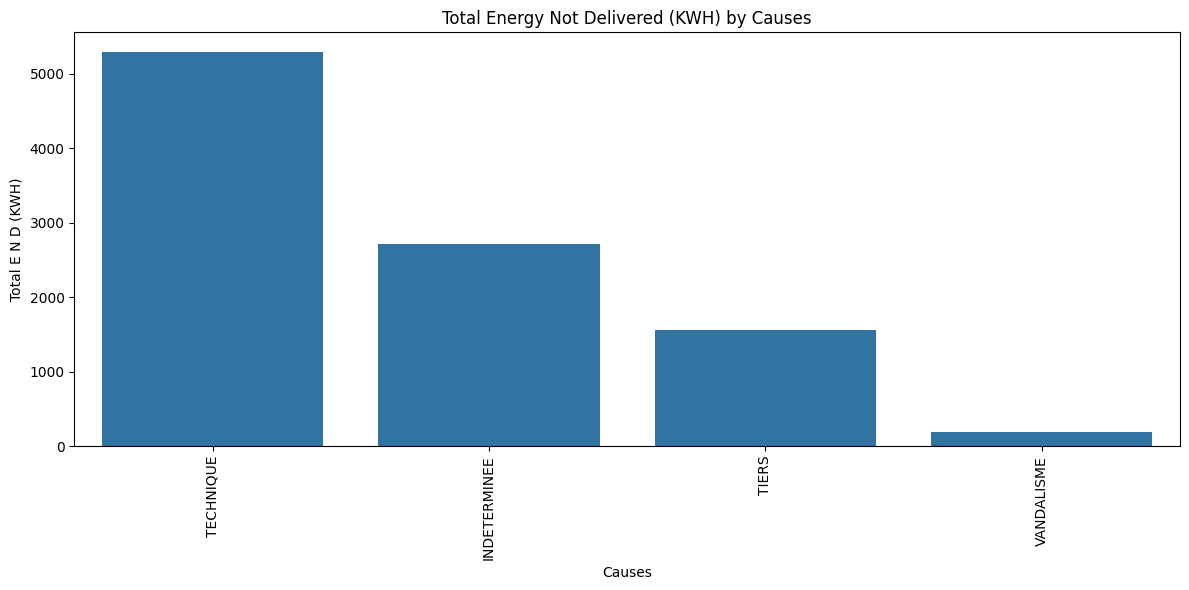

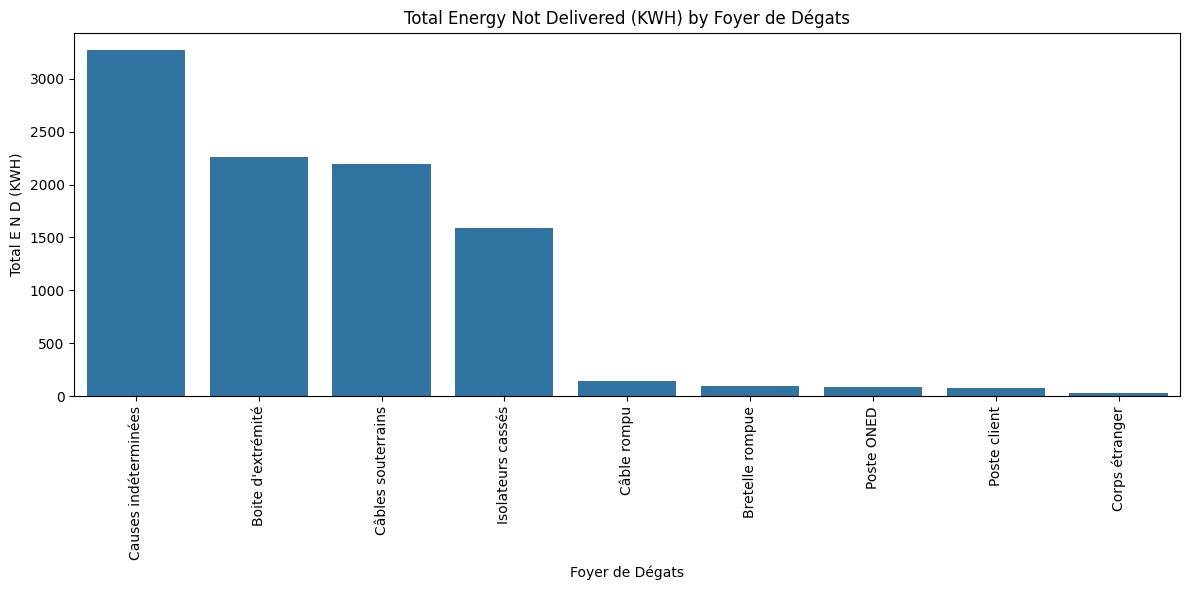

Top 10 Causes of Energy Loss:
CAUSES
TECHNIQUE       5290.331475
INDETERMINEE    2708.808625
TIERS           1553.221354
VANDALISME       192.930000
Name: E N D (KWH), dtype: float64

Top 10 Foyers de Dégats of Energy Loss:
FOYER DE DEGATS
Causes indéterminées    3269.596124
Boite d'extrémité       2259.124374
Câbles souterrains      2190.933456
Isolateurs cassés       1591.857188
Câble rompu              146.255625
Bretelle rompue           93.630938
Poste ONED                89.535000
Poste client              76.458750
Corps étranger            27.900000
Name: E N D (KWH), dtype: float64


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = '/Users/abderrahim_boussyf/Desktop/Annalyse_Electr/TB Fin Mai 2024.xlsm'
df = pd.read_excel(file_path, sheet_name='BDD 2023')

# Filter for Dakhla
df_dakhla = df[df['LIGNE OU INSTALLATION'].str.contains('DAKHLA', case=False, na=False)]

# Data Analysis
# Group by 'CAUSES' and sum 'E N D (KWH)'
causes_loss = df_dakhla.groupby('CAUSES')['E N D (KWH)'].sum().sort_values(ascending=False)

# Group by 'FOYER DE DEGATS' and sum 'E N D (KWH)'
foyer_loss = df_dakhla.groupby('FOYER DE DEGATS')['E N D (KWH)'].sum().sort_values(ascending=False)

# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(x=causes_loss.index, y=causes_loss.values)
plt.title('Total Energy Not Delivered (KWH) by Causes')
plt.xlabel('Causes')
plt.ylabel('Total E N D (KWH)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=foyer_loss.index, y=foyer_loss.values)
plt.title('Total Energy Not Delivered (KWH) by Foyer de Dégats')
plt.xlabel('Foyer de Dégats')
plt.ylabel('Total E N D (KWH)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Display the top 10 causes and foyers of loss
print("Top 10 Causes of Energy Loss:")
print(causes_loss.head(10))
print("\nTop 10 Foyers de Dégats of Energy Loss:")
print(foyer_loss.head(10))


/var/folders/7t/gg3mx1h95mb1m7llh2dfnhd40000gn/T/ipykernel_63515/2185845242.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


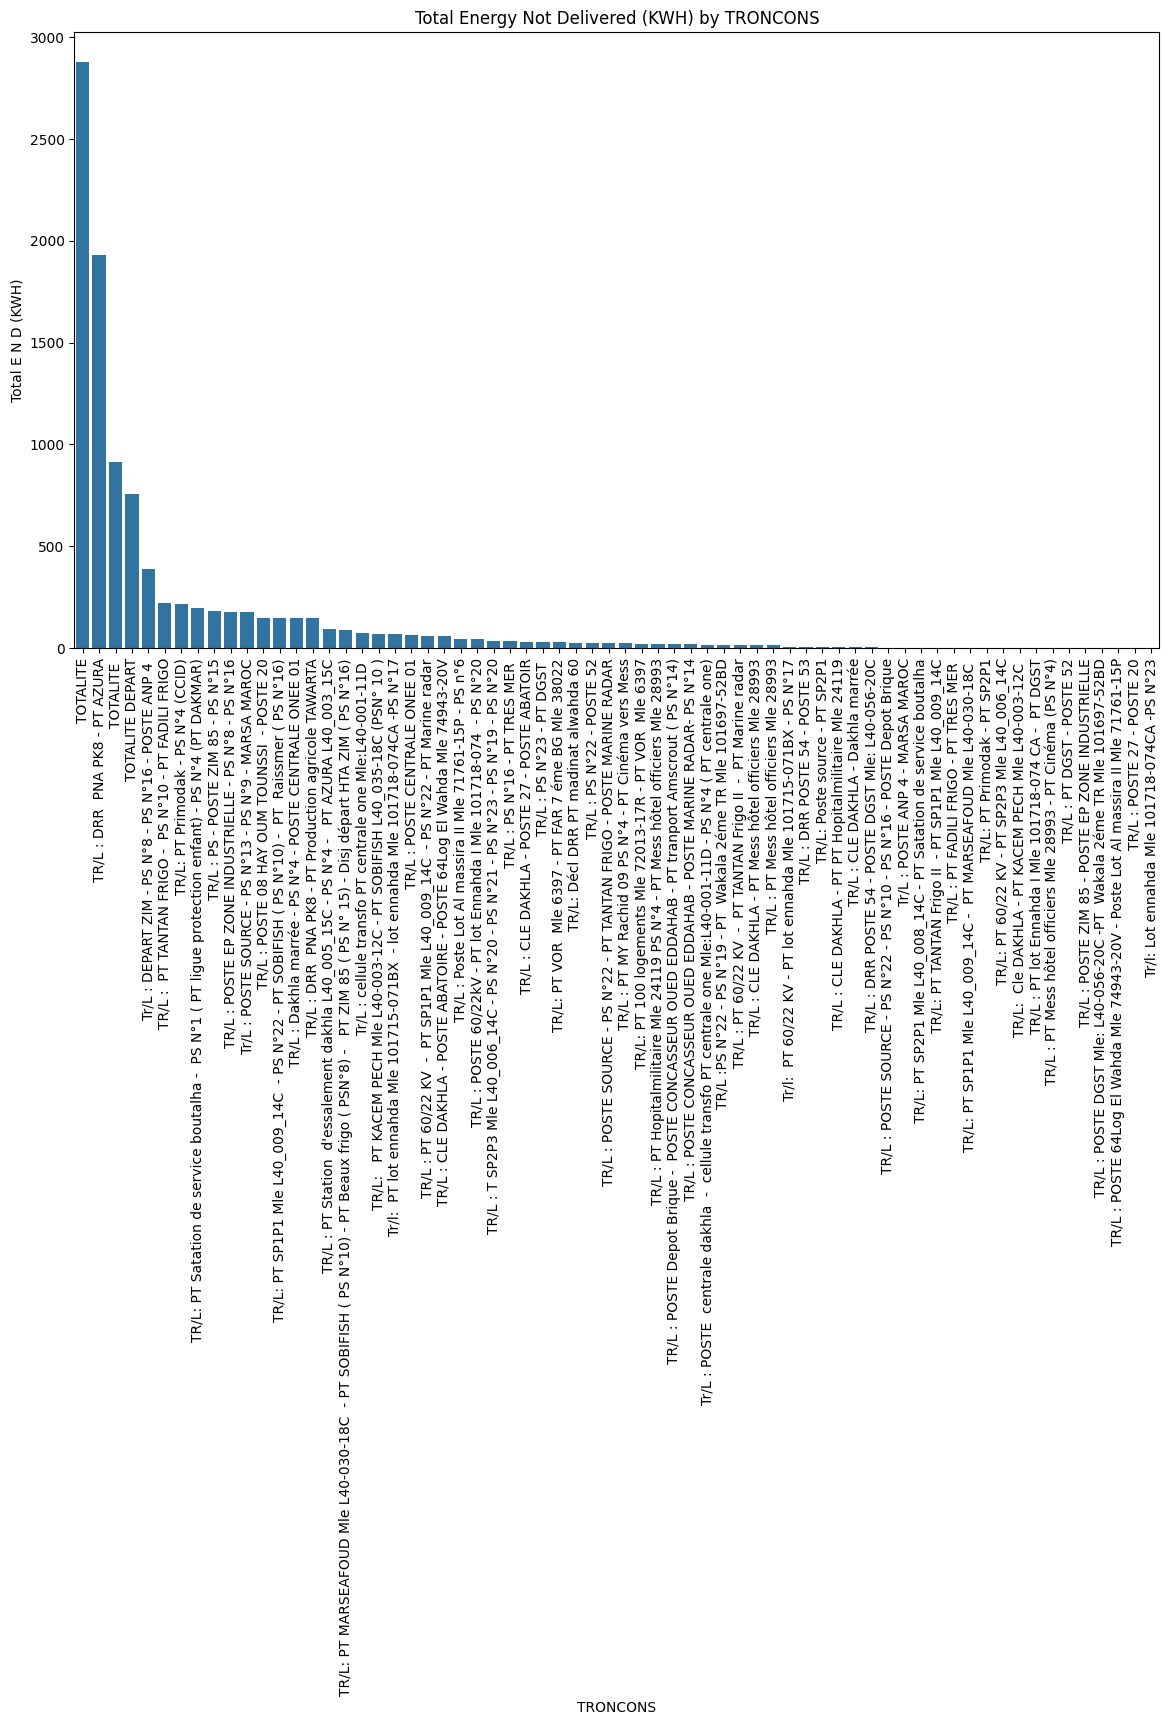

Top 10 TRONCONS with Highest Energy Loss:
TRONCONS
TOTALITE                                                                                              2879.704163
TR/L : DRR  PNA PK8 - PT AZURA                                                                        1927.977186
TOTALITE                                                                                               913.890625
TOTALITE DEPART                                                                                        757.746875
Tr/L : DEPART ZIM - PS N°8 - PS N°16 - POSTE ANP 4                                                     388.668750
TR/L :  PT TANTAN FRIGO -  PS N°10 - PT FADILI FRIGO                                                   220.680000
TR/L: PT Primodak - PS N°4 (CCID)                                                                      215.105625
TR/L: PT Satation de service boutalha -  PS N°1 ( PT ligue protection enfant) - PS N°4 (PT DAKMAR)     198.450000
TR/L : PS - POSTE ZIM 85 - PS N°15   

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = '/Users/abderrahim_boussyf/Desktop/Annalyse_Electr/TB Fin Mai 2024.xlsm'
df = pd.read_excel(file_path, sheet_name='BDD 2023')

# Filter for Dakhla
df_dakhla = df[df['LIGNE OU INSTALLATION'].str.contains('DAKHLA', case=False, na=False)]

# Group by 'TRONCONS' and sum 'E N D (KWH)'
troncons_loss = df_dakhla.groupby('TRONCONS')['E N D (KWH)'].sum().sort_values(ascending=False)

# Plotting the data
plt.figure(figsize=(14, 8))
sns.barplot(x=troncons_loss.index, y=troncons_loss.values)
plt.title('Total Energy Not Delivered (KWH) by TRONCONS')
plt.xlabel('TRONCONS')
plt.ylabel('Total E N D (KWH)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Display the top 10 TRONCONS with highest energy loss
print("Top 10 TRONCONS with Highest Energy Loss:")
print(troncons_loss.head(10))


/var/folders/7t/gg3mx1h95mb1m7llh2dfnhd40000gn/T/ipykernel_63515/3929904815.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dakhla['DUREE (H)'] = pd.to_timedelta(df_dakhla['DUREE (H)'], errors='coerce').dt.total_seconds() / 3600


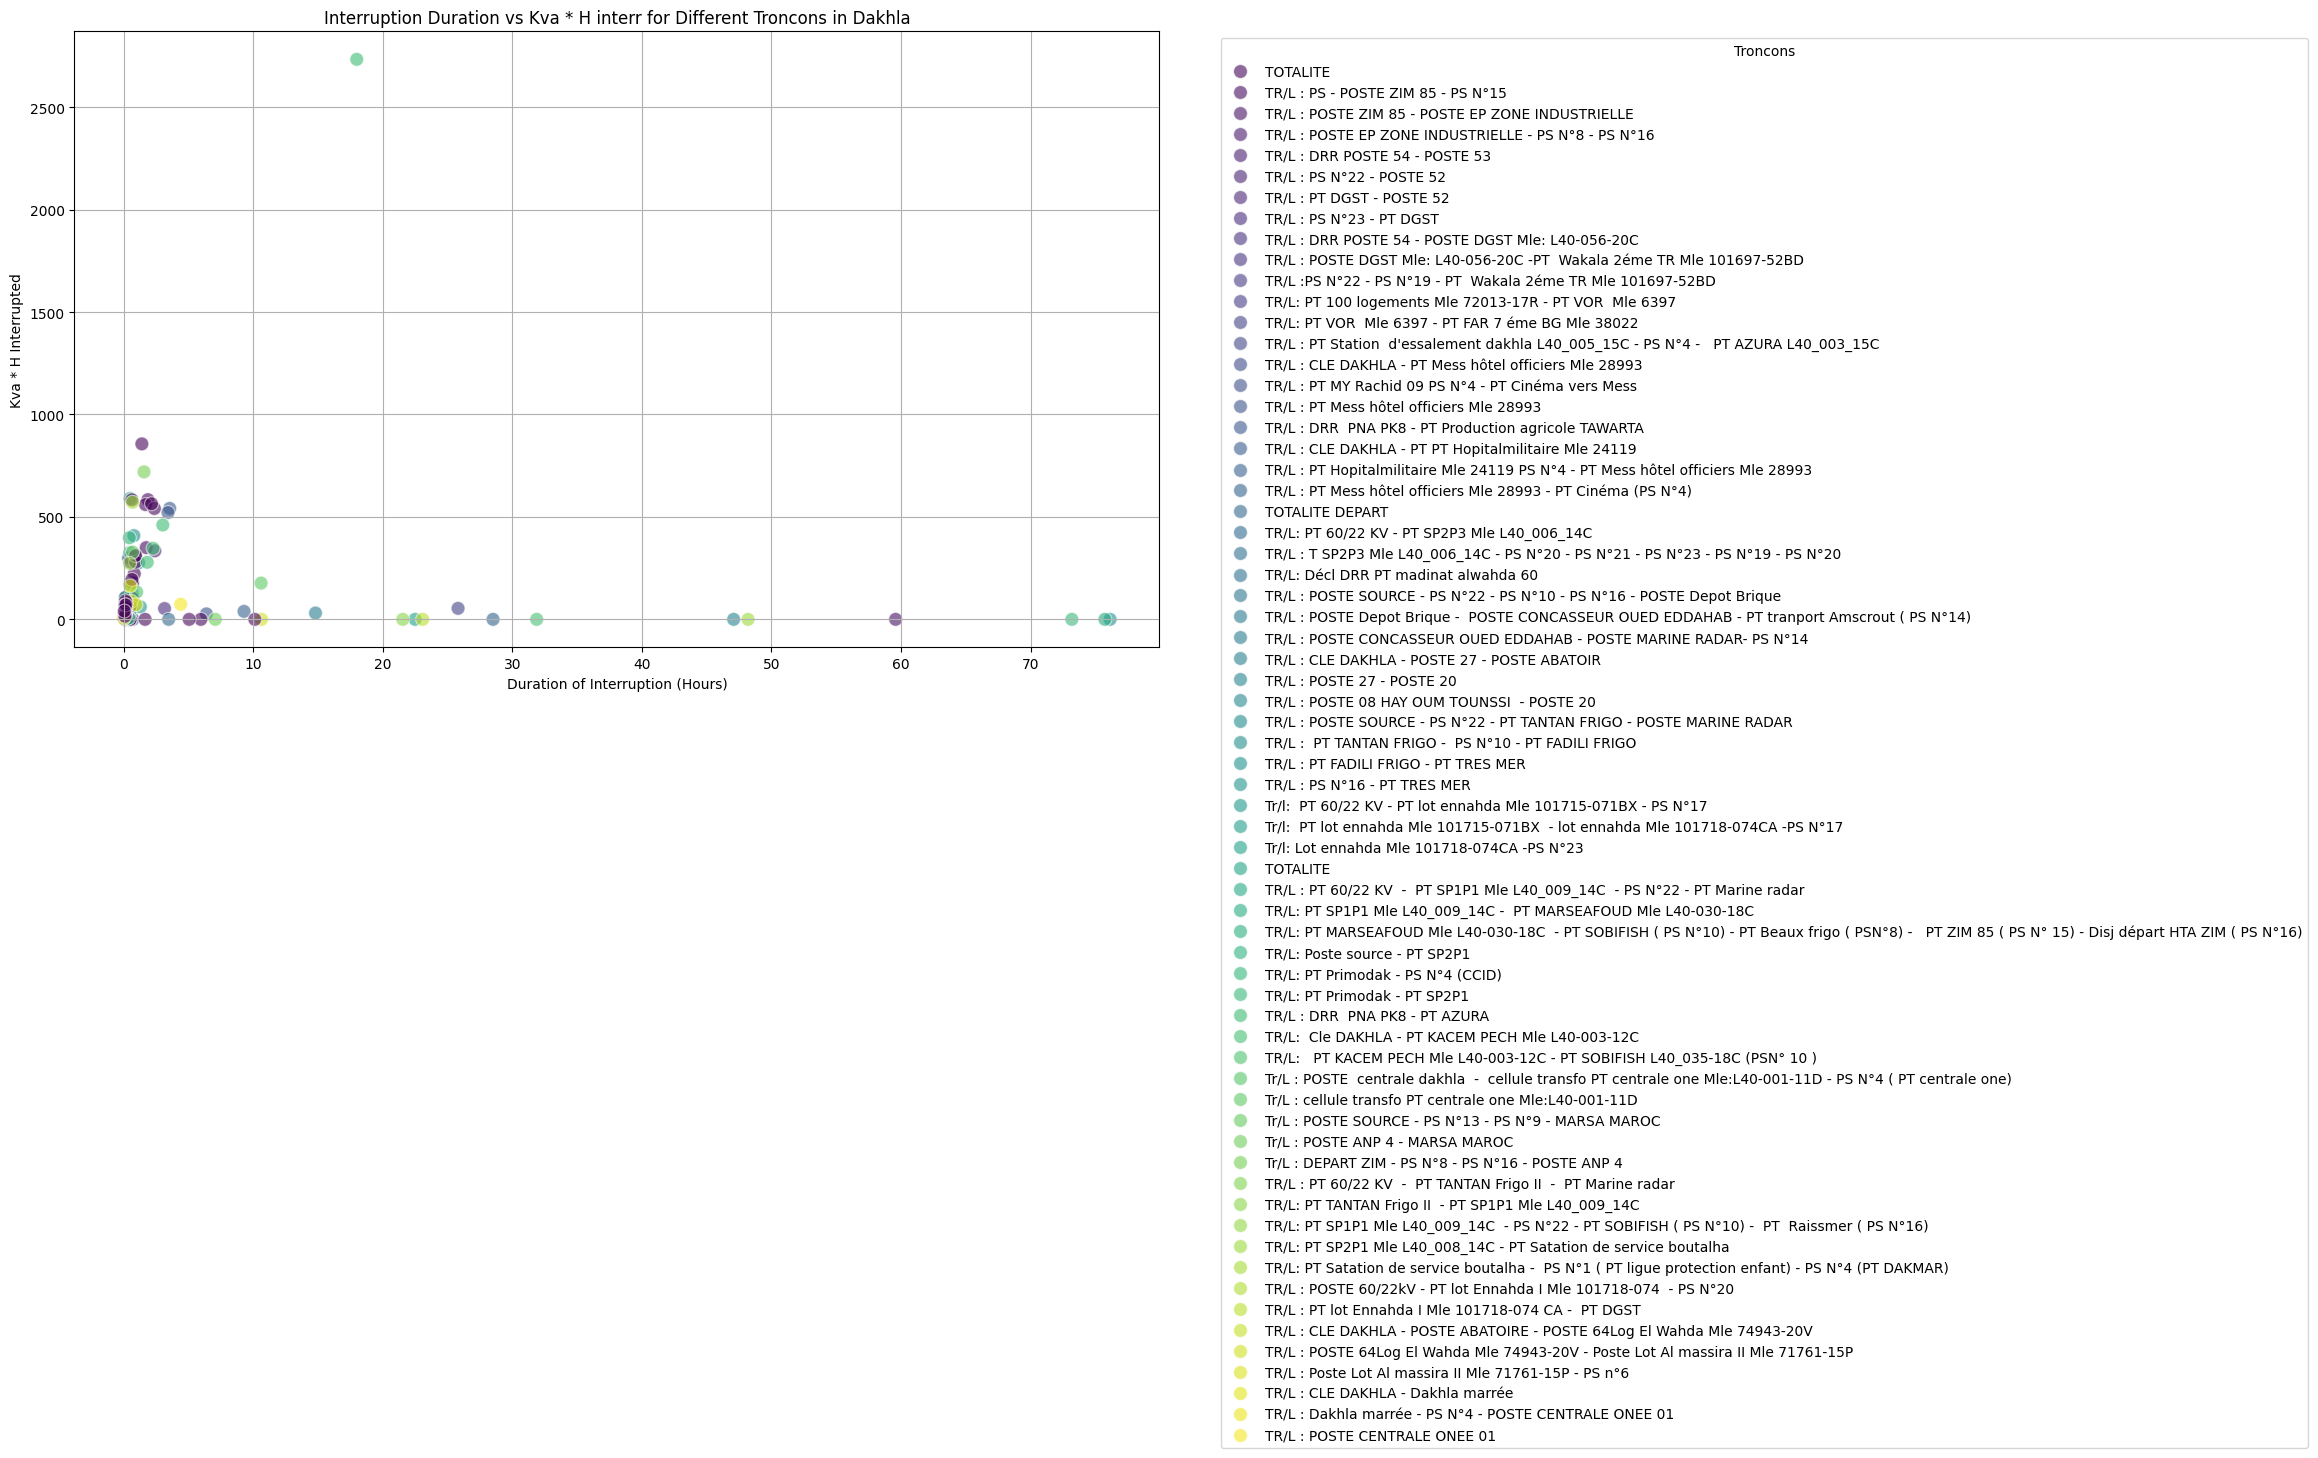

Areas with Prolonged Interruptions:
        POSTE SOURCE            LIGNE OU INSTALLATION  \
99   CENTRALE DAKHLA            CENTRALE DAKHLA - ZIM   
100  CENTRALE DAKHLA            CENTRALE DAKHLA - ZIM   
101  CENTRALE DAKHLA            CENTRALE DAKHLA - ZIM   
122           DAKHLA               DAKHLA - ENNAHDA I   
191  CENTRALE DAKHLA      CENTRALE DAKHLA - CONGELDAK   
197  CENTRALE DAKHLA      CENTRALE DAKHLA - CONGELDAK   
212           DAKHLA                 DAKHLA - ALMOHIT   
231  CENTRALE DAKHLA      CENTRALE DAKHLA - CONGELDAK   
232  CENTRALE DAKHLA      CENTRALE DAKHLA - CONGELDAK   
262           DAKHLA               DAKHLA - ENNAHDA I   
307           DAKHLA                 DAKHLA - USINE 1   
349  CENTRALE DAKHLA            CENTRALE DAKHLA - CQP   
362           DAKHLA                 DAKHLA - ALMOHIT   
371           DAKHLA                 DAKHLA - USINE 1   
376           DAKHLA             DAKHLA - Al QASSAM I   
420           DAKHLA                 DAKHLA - USINE 

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_interruption_duration_and_restoration(file_path):
    # Load Excel data into a DataFrame
    df = pd.read_excel(file_path, sheet_name='BDD 2023')

    # Filter data for Dakhla
    df_dakhla = df[df['POSTE SOURCE'].str.contains('DAKHLA', na=False)]

    # Check for missing values in 'DUREE (H)' and 'Kva * H interr' columns
    if df_dakhla['DUREE (H)'].isnull().any() or df_dakhla['Kva * H interr'].isnull().any():
        print("Warning: Missing values found in 'DUREE (H)' or 'Kva * H interr' columns.")
    
    # Convert 'DUREE (H)' to numeric, handle any conversion issues
    df_dakhla['DUREE (H)'] = pd.to_timedelta(df_dakhla['DUREE (H)'], errors='coerce').dt.total_seconds() / 3600

    # Plotting the relationship between interruption duration and energy not delivered
    plt.figure(figsize=(14, 8))
    sns.scatterplot(x='DUREE (H)', y='Kva * H interr', hue='TRONCONS', data=df_dakhla, palette='viridis', s=100, alpha=0.6)
    plt.title('Interruption Duration vs Kva * H interr for Different Troncons in Dakhla')
    plt.xlabel('Duration of Interruption (Hours)')
    plt.ylabel('Kva * H Interrupted')
    plt.legend(title='Troncons', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

    # Identifying areas with prolonged interruptions
    prolonged_interruptions = df_dakhla[df_dakhla['DUREE (H)'] > df_dakhla['DUREE (H)'].quantile(0.75)]
    print("Areas with Prolonged Interruptions:")
    print(prolonged_interruptions[['POSTE SOURCE', 'LIGNE OU INSTALLATION', 'TRONCONS', 'DUREE (H)', 'Kva * H interr']])
    
    # Summary statistics for further insight
    print("\nSummary Statistics for 'DUREE (H)':")
    print(df_dakhla['DUREE (H)'].describe())
    
    print("\nSummary Statistics for 'Kva * H interr':")
    print(df_dakhla['Kva * H interr'].describe())

# Example usage
file_path = '/Users/abderrahim_boussyf/Desktop/Annalyse_Electr/TB Fin Mai 2024.xlsm'
analyze_interruption_duration_and_restoration(file_path)


In [21]:
print(df_dakhla[['NB INC', 'HPL (H)']].dtypes)

NB INC     float64
HPL (H)     object
dtype: object
